# XGBRegressor

In [7]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
from math import sqrt

In [2]:
df1=pd.read_csv('C:\\Users\\Rohan\\Desktop\\Leiden U\\advances in data mining LU\\assignments\\A2\\sales_train.csv')

In [3]:
df1.head() #Checking the data is imported as expected

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
df1.shape

(2935849, 6)

#### PreProcessing

In [5]:
df1 = df1[df1['item_price'] >= 1]

In [6]:
df1.shape

(2931191, 6)

In [7]:
df1 = df1[df1['item_cnt_day'] >= 0]
df1 = df1.iloc[:, 1:6]

In [8]:
df1.shape

(2923839, 5)

In [9]:
cols = ['date_block_num', 'shop_id', 'item_id']
df2 = df1.groupby(cols)[["item_cnt_day"]].sum().add_suffix('_monthly_sum') #Grouping by month,shopid,itemid and finding monthly sum of item_cnt_day for each unique record
df = df1.join(df2, on=cols) #Adding in the remaining columns
df = df.drop(columns=['item_cnt_day']) #Dropping an unnecessary column
df = df.drop_duplicates() #removing duplicate rows caused due to the item_cnt_day column which is now removed
df.head(30)

,date_block_num,shop_id,item_id,item_price,item_cnt_day_monthly_sum
0,0,59,22154,999.00,1.0
1,0,25,2552,899.00,1.0
3,0,25,2554,1709.05,1.0
4,0,25,2555,1099.00,1.0
5,0,25,2564,349.00,1.0
6,0,25,2565,549.00,1.0
7,0,25,2572,239.00,2.0
8,0,25,2572,299.00,2.0
9,0,25,2573,299.00,3.0
10,0,25,2574,399.00,13.0


In [10]:
X=df.iloc[:, :4]
y=df.iloc[:, 4]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #splitting the data

In [11]:
X.head()

,date_block_num,shop_id,item_id,item_price
0,0,59,22154,999.00
1,0,25,2552,899.00
3,0,25,2554,1709.05
4,0,25,2555,1099.00
5,0,25,2564,349.00


In [12]:
y.head()

0    1.0
1    1.0
3    1.0
4    1.0
5    1.0
Name: item_cnt_day_monthly_sum, dtype: float64

In [13]:
#Defining the XGBRegressor with relevant hyperparameters
xgbr = xgb.XGBRegressor(objective='reg:linear', max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=5)
print(xgbr) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=0.5, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


In [14]:
xgbr.fit(X_train,y_train)

[18:28:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=0.5, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', ...)

In [15]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9613131155634957


In [16]:
ypred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 18.71


In [17]:
score = xgbr.score(X_test, y_test)  
print("Test score: ", score)

Test score:  0.8862942819100688


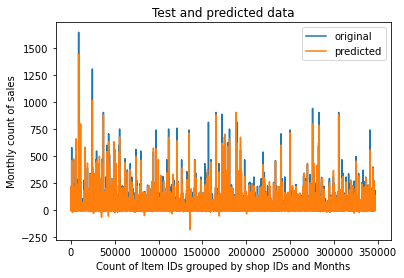

In [19]:
#Creating a figure to visualize predicted vs test data

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Test and predicted data")
plt.xlabel("Count of Item IDs grouped by shop IDs and Months")
plt.ylabel("Monthly count of sales")
plt.legend()
plt.show()

In [4]:
print('RMSE: ',sqrt(18.71)) #RMSE

RMSE:  4.325505750776434
